In [29]:
import os
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pathlib import Path
from shutil import copyfile

In [30]:
def split_dataset(source, training, testing, validation, split_size):

  file_names = os.listdir(source) 
  file_number = len(file_names) 

  for index, file in enumerate(file_names): 
      if index < split_size * file_number: 
        if index < 0.8 * file_number:
          copyfile(os.path.join(source, file), os.path.join(training, file))
        else:
          copyfile(os.path.join(source, file), os.path.join(validation, file))
      else: 
          copyfile(os.path.join(source, file), os.path.join(testing, file))

In [31]:
new_train_dir = r'/Users/apple/Documents/PROJECTS/Braille_Translator/BRAIT-Machine-Learning-main/Dataset/train'
new_test_dir = r'/Users/apple/Documents/PROJECTS/Braille_Translator/BRAIT-Machine-Learning-main/Dataset/test'
new_val_dir = r'/Users/apple/Documents/PROJECTS/Braille_Translator/BRAIT-Machine-Learning-main/Dataset/validation'

for path in [new_train_dir, new_test_dir, new_val_dir]:
    os.makedirs(path, exist_ok=True)

In [32]:
source_dataset = r"/Users/apple/Documents/PROJECTS/Braille_Translator/BRAIT-Machine-Learning-main/BrailleDataset"
dataset_list = os.listdir(source_dataset)

for data in dataset_list:
    class_path = os.path.join(source_dataset, data)
    print(data, ":", len(os.listdir(class_path)))
    
    os.makedirs(os.path.join(new_train_dir, data), exist_ok=True)
    os.makedirs(os.path.join(new_test_dir, data), exist_ok=True)
    os.makedirs(os.path.join(new_val_dir, data), exist_ok=True)

r : 668
u : 514
i : 614
n : 651
g : 642
z : 536
t : 555
s : 615
a : 609
f : 627
o : 622
h : 614
m : 621
j : 619
c : 780
d : 749
v : 535
q : 635
x : 535
e : 707
b : 609
k : 617
l : 628
y : 540
p : 622
w : 530


In [33]:
split_size = .9

for dt in dataset_list:
  split_dataset(os.path.join(source_dataset, dt), os.path.join(new_train_dir, dt), os.path.join(new_test_dir, dt), os.path.join(new_val_dir, dt), split_size)

In [34]:
path_train = r'/Users/apple/Documents/PROJECTS/Braille_Translator/BRAIT-Machine-Learning-main/Dataset/train'
path_test = r'/Users/apple/Documents/PROJECTS/Braille_Translator/BRAIT-Machine-Learning-main/Dataset/test'
path_val = r'/Users/apple/Documents/PROJECTS/Braille_Translator/BRAIT-Machine-Learning-main/Dataset/validation'

jmh_braille_train = os.listdir(path_train)
jmh_braille_test = os.listdir(path_test)
jmh_braille_val = os.listdir(path_val)

total_images = 0

for braille in jmh_braille_train:
  print(braille, " \t\t\t: ", len(os.listdir(os.path.join(path_train, braille)))+len(os.listdir(os.path.join(path_test, braille)))+len(os.listdir(os.path.join(path_val, braille))), " images")
  total_images += int(len(os.listdir(os.path.join(path_train, braille))))

print("Training Images : " + str(total_images))

r  			:  668  images
u  			:  514  images
i  			:  614  images
n  			:  651  images
g  			:  642  images
z  			:  536  images
t  			:  555  images
s  			:  615  images
a  			:  609  images
f  			:  627  images
o  			:  622  images
h  			:  614  images
m  			:  621  images
j  			:  619  images
c  			:  780  images
d  			:  749  images
v  			:  535  images
q  			:  635  images
x  			:  535  images
e  			:  707  images
b  			:  609  images
k  			:  617  images
l  			:  628  images
y  			:  540  images
p  			:  622  images
w  			:  530  images
Training Images : 12805


In [35]:
from keras_preprocessing.image import ImageDataGenerator

TARGET_SIZE = (28,28)
BATCH_SIZE = 64

TRAINING_DIR = r'/Users/apple/Documents/PROJECTS/Braille_Translator/BRAIT-Machine-Learning-main/Dataset/train'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      validation_split = 0.2,
      fill_mode='nearest')

TESTING_DIR = r'/Users/apple/Documents/PROJECTS/Braille_Translator/BRAIT-Machine-Learning-main/Dataset/test'
testing_datagen = ImageDataGenerator(rescale=1./255)

VALIDATION_DIR = r'/Users/apple/Documents/PROJECTS/Braille_Translator/BRAIT-Machine-Learning-main/Dataset/validation'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=TARGET_SIZE,
	class_mode='categorical',
  batch_size=BATCH_SIZE,
  shuffle = True
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=TARGET_SIZE,
	class_mode='categorical',
  batch_size=BATCH_SIZE,
  shuffle=True
)

test_generator = testing_datagen.flow_from_directory(
    TESTING_DIR,
    target_size=TARGET_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 12805 images belonging to 26 classes.
Found 1602 images belonging to 26 classes.
Found 1587 images belonging to 26 classes.


In [36]:
#cek label
image_dir = Path(r'/Users/apple/Documents/PROJECTS/Braille_Translator/BRAIT-Machine-Learning-main/Dataset/train')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [37]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(10)

,Filepath,Label
0,/Users/apple/Documents/PROJECTS/Braille_Transl...,b
1,/Users/apple/Documents/PROJECTS/Braille_Transl...,c
2,/Users/apple/Documents/PROJECTS/Braille_Transl...,h
3,/Users/apple/Documents/PROJECTS/Braille_Transl...,c
4,/Users/apple/Documents/PROJECTS/Braille_Transl...,g
5,/Users/apple/Documents/PROJECTS/Braille_Transl...,z
6,/Users/apple/Documents/PROJECTS/Braille_Transl...,q
7,/Users/apple/Documents/PROJECTS/Braille_Transl...,x
8,/Users/apple/Documents/PROJECTS/Braille_Transl...,n
9,/Users/apple/Documents/PROJECTS/Braille_Transl...,b


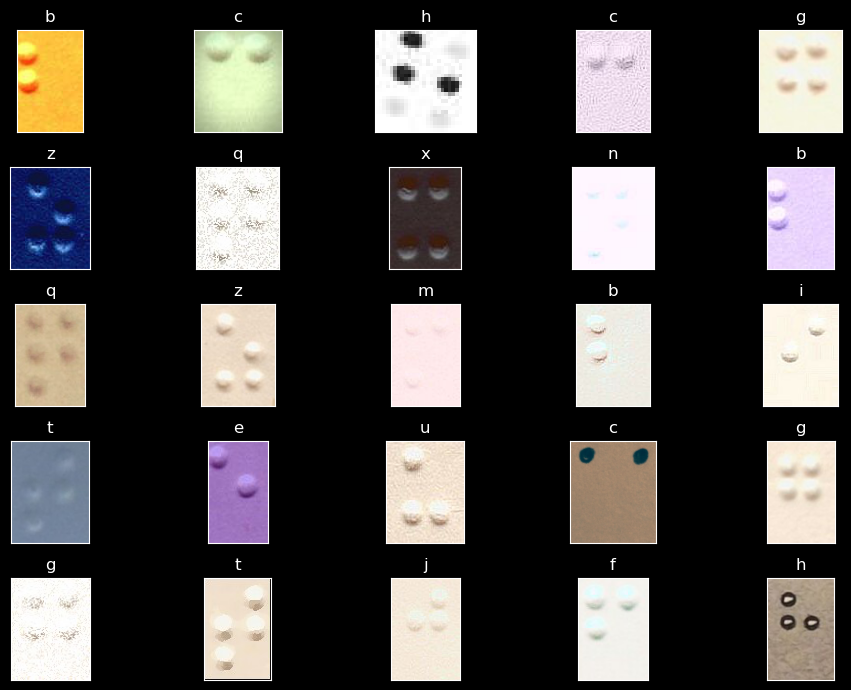

In [38]:
# Display some pictures of the dataset with their labels

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()